In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:

def func(x1,x2):
  return (x1**2 + x2 - 11)**2 + (2*x1 + x2**2 - 7)**2


def  func_grad(x1, x2):
    df_dx1 = 2 * (2 * x1 * (x1**2 + x2 - 11) + 2 * x1 + x2**2 - 7)
    df_dx2 = 2 * ((x1**2 + x2 - 11) + 2 * x2 * (2 * x1 + x2**2 - 7))
     
    return np.array([df_dx1, df_dx2])



In [146]:
class Optimizers:
  def __init__(self, lr_schedule, rate=0.01):
    self.lr_schedule=self.lr(lr_schedule, rate)
    
  def lr(self,lr_schedule,rate):
    if lr_schedule=="constant" :
      return self.constant_lr(rate)
    
  def  constant_lr(self,rate): 
    return rate
  
  def gradient_descent(self,x1,x2,t1,t2,func_grad):
    gr_x1, gr_x2= func_grad(x1,x2)
    print(x1-self.lr_schedule*gr_x1, x2-self.lr_schedule*gr_x2,0,0)
    return x1-self.lr_schedule*gr_x1, x2-self.lr_schedule*gr_x2,0,0
  
  def stochastic_gradient_descent(self,x1,x2,t1,t2,func_grad):
    gr_x1, gr_x2= func_grad(x1,x2)
    gr_x1 += np.random.normal(0,1) 
    gr_x2 += np.random.normal(0,1) 
    return   x1-self.lr_schedule*gr_x1, x2-self.lr_schedule*gr_x2,0,0
  
  def stochastic_gradient_descent_with_momentum(self,x1,x2,v1,v2,func_grad):
    alpha=0.9
    gr_x1,gr_x2= func_grad(x1,x2)
    v1=alpha*v1- self.lr_schedule*gr_x1
    v2=alpha*v1- self.lr_schedule*gr_x2
    return x1+v1,x2+v2,v1,v2
  
  def nesterov_stochastic_gradient_descent_with_momentum(self,x1,x2,v1,v2,func_grad):
    alpha=0.9
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1,gr_x2= func_grad(x1,x2)
    v1=alpha*v1- self.lr_schedule*gr_x1
    v2=alpha*v1- self.lr_schedule*gr_x2
    return x1+v1,x2+v2,v1,v2
  
  def Ada_Grad(self,x1,x2,r1,r2,func_grad):
    delta= 1e-7
    gr_x1,gr_x2= func_grad(x1,x2)
    r1 +=gr_x1**2
    r2 +=gr_x1**2
    x1 -= self.lr_schedule/(delta+np.sqrt(r1))*gr_x1
    x2 -= self.lr_schedule/(delta+np.sqrt(r2))*gr_x2
    return x1,x2,r1,r2
  def RMS_Prop(self,x1,x2,r1,r2,func_grad):
    p=0.9
    delta=1e-7
    gr_x1,gr_x2= func_grad(x1,x2)
    r1 = p*r1 + (1-p)*gr_x1**2
    r2 = p*r2 + (1-p)*gr_x2**2
    x1 -= self.lr_schedule/np.sqrt(delta+r1)*gr_x1
    x2 -= self.lr_schedule/np.sqrt(delta+r2)*gr_x2
    
    return x1,x2,r1,r2
  
  def RMS_Prop_with_Nesterov(self,x1,x2,r1,r2,v1,v2,func_grad,p=0.9,alpha=0.9):
    
    delta= 1e-7
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1,gr_x2= func_grad(x1,x2)
    r1 = p*r1 + (1-p)*gr_x1**2
    r2 = p*r2 + (1-p)*gr_x2**2
    v1=alpha*v1-(delta/np.sqrt(r1))*gr_x1
    v2=alpha*v1-(delta/np.sqrt(r2))*gr_x2
    return x1+v1,x2+v2,r1,r2,v1,v2  

In [153]:
def search(optimizer,func_grad,iteration=20):
  x1,x2,t1,t2=0,0, 0, 0
  x_iterations=[(x1,x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad)
    x_iterations.append((x1,x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1,x1,x2))
  return x_iterations

In [154]:

def search_path(func,x_iterations):
  plt.plot(*zip(*x_iterations),"-o",color="red")
  x1,x2=np.meshgrid(np.arange(-5.5, 5.5, 0.1),np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1,x2,func(x1,x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

0.14 0.22 0 0
0.33369024 0.49391808000000004 0 0
0.5942083635646104 0.8221047930758267 0 0
0.9304423127885895 1.1874852563433347 0 0
1.3380011434941368 1.5435461157760741 0 0
1.7871261454072385 1.816739765429468 0 0
2.217785651703931 1.9456271206164026 0 0
2.560257615551224 1.9333158687471996 0 0
2.7803237322542476 1.8398496979270833 0 0
2.900438828933657 1.7252572944870772 0 0
2.964921042812372 1.6198430111663404 0 0
3.003747375556541 1.5309588432670633 0 0
3.0303728587591685 1.4571364924113928 0 0
3.0502944799591356 1.395321023616503 0 0
3.065994496401176 1.3428641815278208 0 0
3.078784591605339 1.297762657496943 0 0
3.089451959120727 1.2585330759571967 0 0
3.098510192149658 1.2240673107783802 0 0
3.1063132727313123 1.1935239014651173 0 0
3.1131149271622833 1.166252783316032 0 0
epoch 20, x1:3.1131149271622833, x2:1.166252783316032


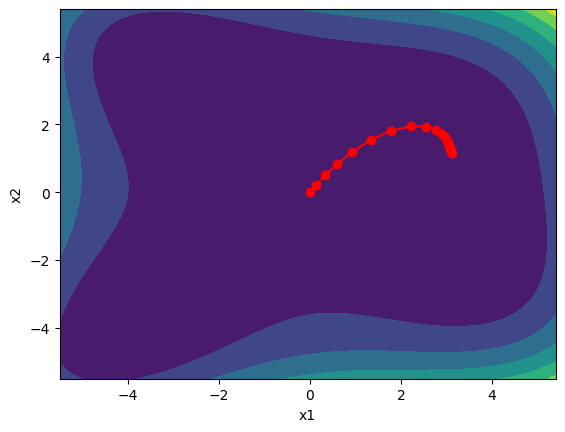

In [155]:
opt=Optimizers("constant",0.01)
search_path(func,search(opt.gradient_descent,func_grad))

epoch 20, x1:3.116998197249691, x2:1.180264701070365


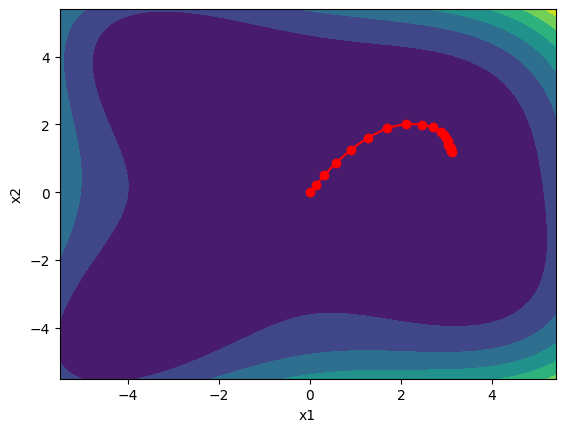

In [156]:
opt=Optimizers("constant",0.01)
search_path(func,search(opt.stochastic_gradient_descent,func_grad))

epoch 20, x1:3.060520037664368, x2:0.8977800172211718


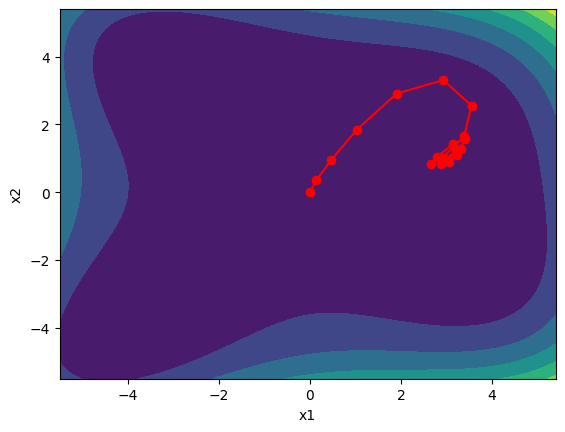

In [157]:
opt=Optimizers("constant",0.01)
search_path(func,search(opt.stochastic_gradient_descent_with_momentum,func_grad))

epoch 20, x1:3.1921378328379135, x2:0.5959896588891712


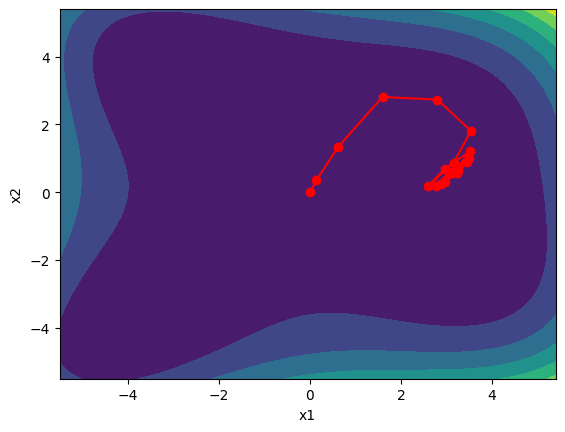

In [158]:
opt=Optimizers("constant",0.01)
search_path(func,search(opt.nesterov_stochastic_gradient_descent_with_momentum,func_grad))

epoch 20, x1:3.1686921979234084, x2:0.9204151241266036


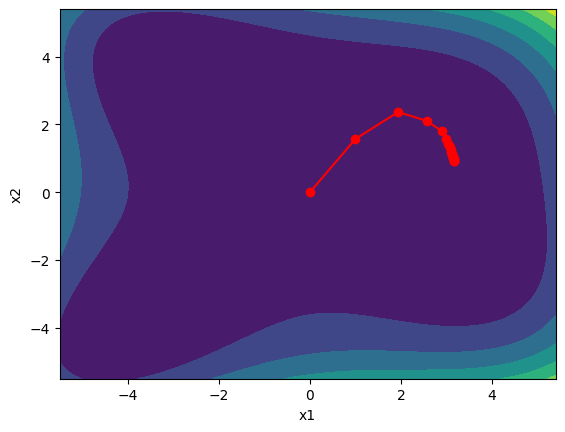

In [161]:
opt=Optimizers("constant",1)
search_path(func,search(opt.Ada_Grad,func_grad))

epoch 20, x1:3.161074381465606, x2:0.9500139133580509


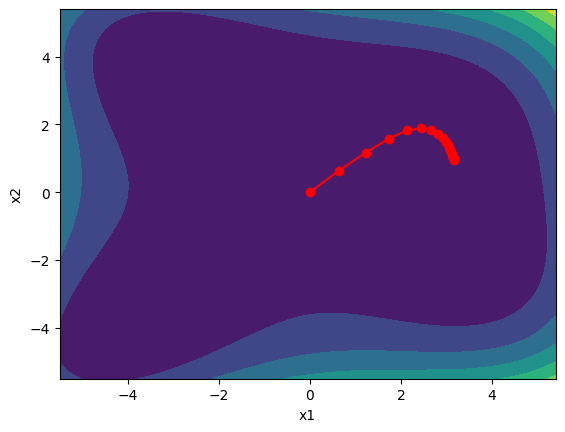

In [167]:
opt=Optimizers("constant",0.2)
search_path(func,search(opt.RMS_Prop,func_grad))

my answer

In [174]:
def new_search(optimizer,func_grad,iteration=20):
  x1,x2,t1,t2,v1,v2=0,0, 0, 0, 0, 0 
  x_iterations=[(x1,x2)]
  for i in range(iteration):
    x1, x2, t1, t2,v1,v2 = optimizer(x1, x2, t1, t2,v1,v2, func_grad)
    x_iterations.append((x1,x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1,x1,x2))
  return x_iterations
    

In [176]:
def search_path(func,x_iterations):
  plt.plot(*zip(*x_iterations),"-o",color="red")
  x1,x2=np.meshgrid(np.arange(-5.5, 5.5, 0.1),np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1,x2,func(x1,x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

epoch 20, x1:3.473545709417453e-05, x2:3.6594096295836995e-05


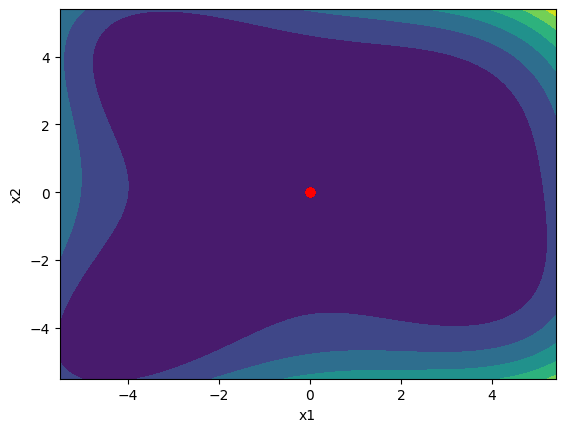

In [184]:
opt=Optimizers("constant",1)
search_path(func,new_search(opt.RMS_Prop_with_Nesterov,func_grad))